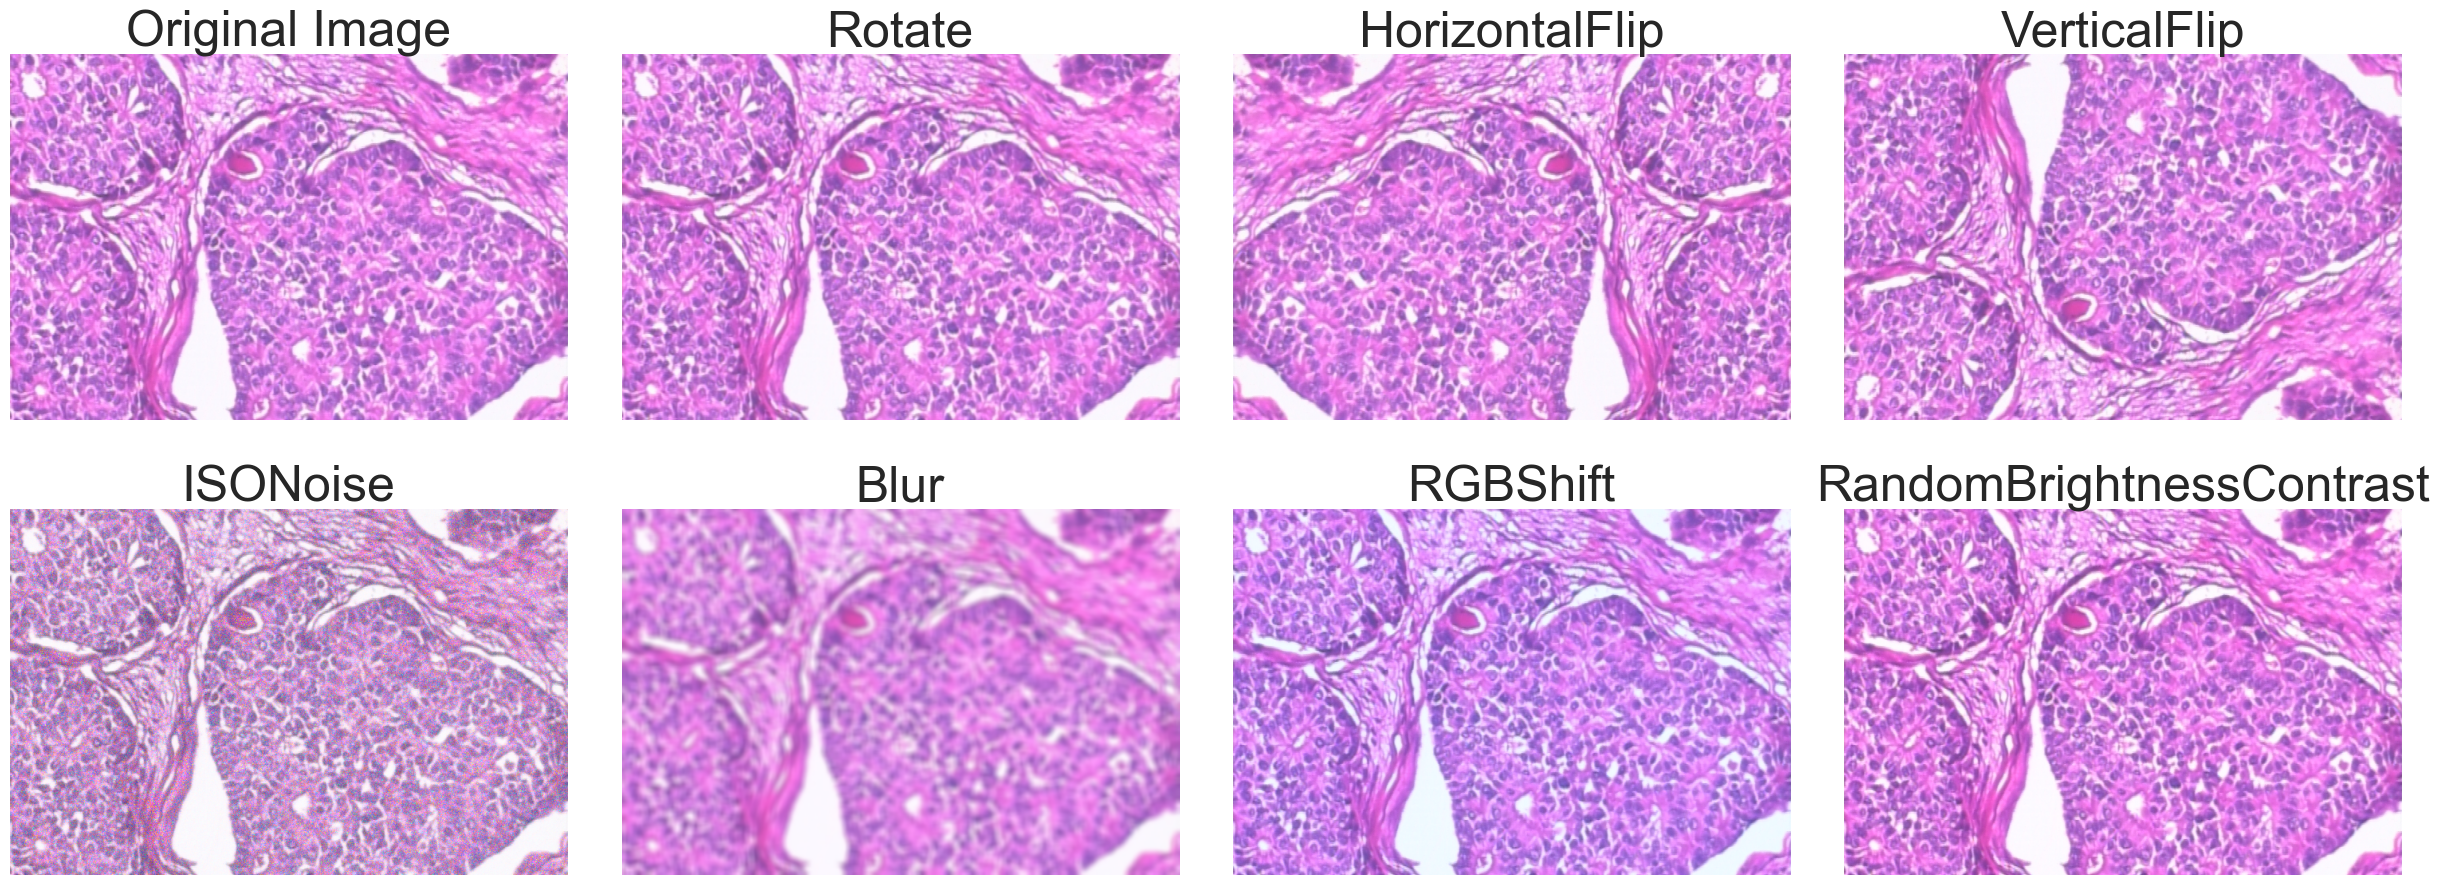

In [1]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import seaborn as sns

sns.set_theme(font_scale=3)

image_path = './SOB_M_DC-14-2523-100-033.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

augmentations = [
    A.Rotate(limit=20, p=1),
    A.HorizontalFlip(p=1),
    A.VerticalFlip(p=1),
    A.ISONoise(color_shift=(0.3, 0.3), intensity=(0.5, 0.5), p=1),
    A.Blur(blur_limit=10, p=1),
    A.RGBShift(p=1),
    A.RandomBrightnessContrast(p=1),
]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))
axes = axes.ravel()

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

for i, aug in enumerate(augmentations, start=1):
    augmented = aug(image=image)['image']
    axes[i].imshow(augmented)
    axes[i].set_title(f"{aug.__class__.__name__}")
    axes[i].axis('off')

plt.tight_layout()
plt.savefig("augmentations.pdf", format="pdf", dpi=300, bbox_inches='tight')